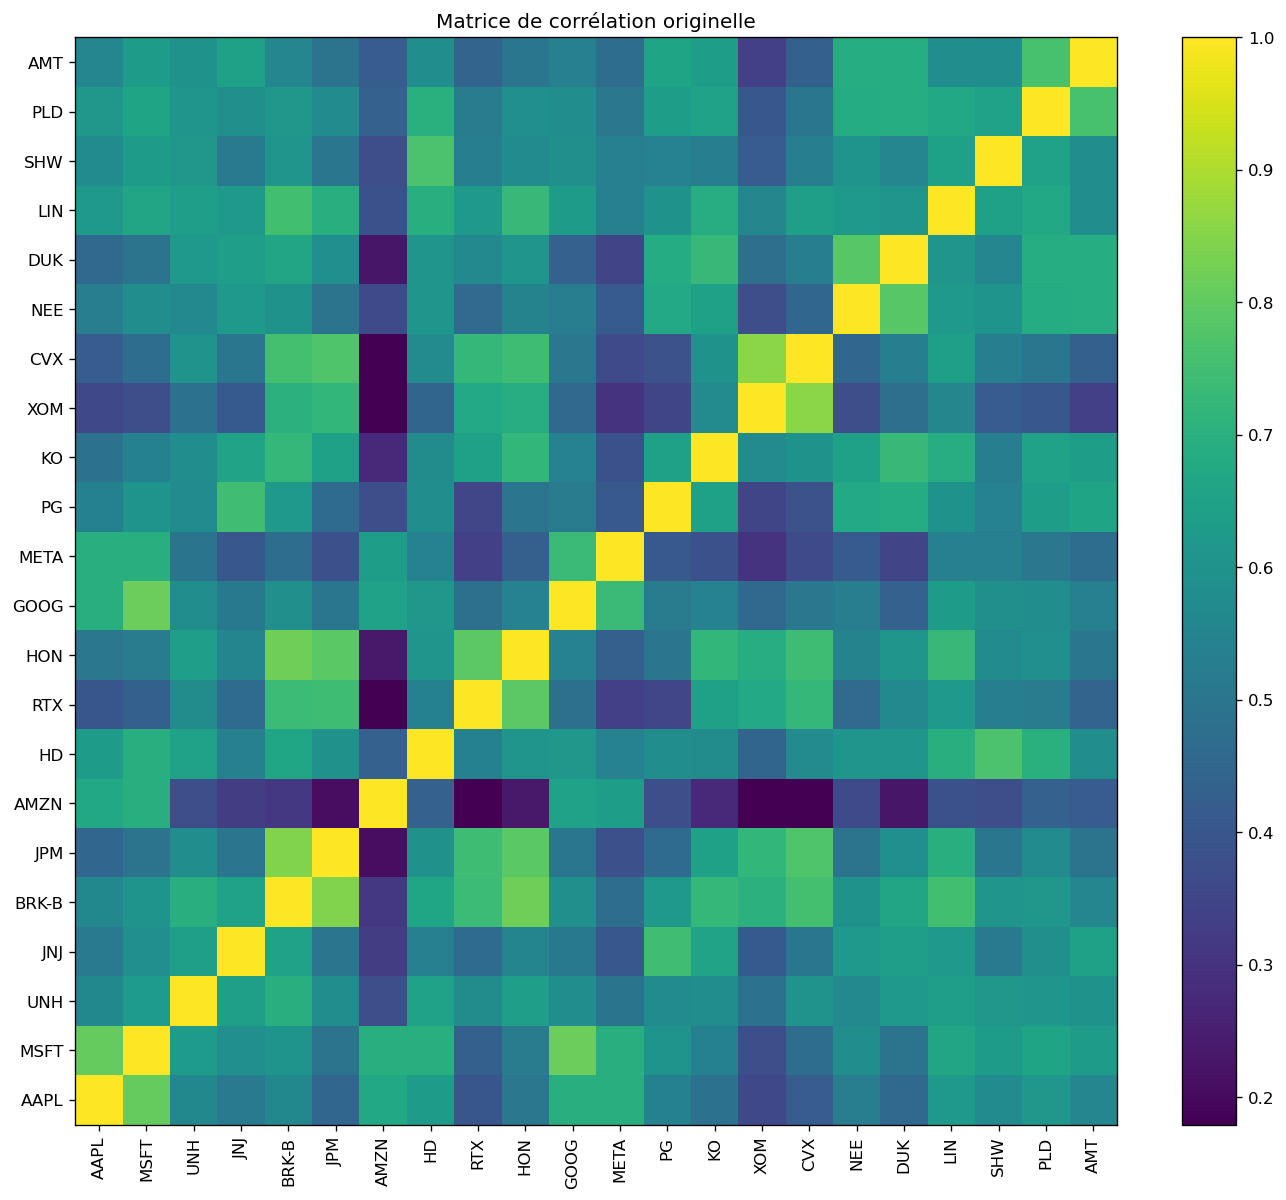

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import squareform

# Import de données
stockData = pd.read_csv("/Users/iliasrazig/Documents/mbf3/Mémoire/sp500.csv", header=[0], index_col=[0], parse_dates= True)
topsectosp500 = pd.read_excel("/Users/iliasrazig/Documents/mbf3/Mémoire/stocks_list.xlsx")
stocks = topsectosp500['Ticker Yahoo'].values.tolist()
stockData = stockData[stocks]
stockData = stockData.dropna()
stockData = stockData.loc[stockData.index <= '2021-12-31']
stockData = stockData.loc[stockData.index > '2019-12-31']
returns = stockData.pct_change()
returns = returns.dropna()

corr = returns.corr()
cov = returns.cov()

plt.figure(figsize=(14,12),dpi=120)
plt.pcolormesh(corr)

ticks_positions = np.arange(len(corr.columns))
plt.xticks(ticks_positions + 0.5, corr.columns, rotation='vertical')
plt.yticks(ticks_positions + 0.5, corr.columns)
plt.colorbar()
plt.title('Matrice de corrélation originelle')
plt.savefig("/Users/iliasrazig/Documents/mbf3/Mémoire/Matrices de corrélation/Matrice_correlation_originelle.png")
plt.show()



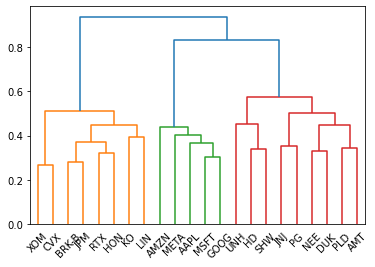

In [3]:
# Création de la métrique de distance 
distance = np.sqrt(0.5 * (1 - corr))

# Clustering
linkage_matrix = linkage(squareform(distance), method='ward')
dendro = dendrogram(linkage_matrix, labels=returns.columns)

In [4]:
actif_names = returns.columns

In [5]:
# Quasi diagonalisation

def tri(arbre, N, curr_index):
    if curr_index < N:
        return [curr_index]
    else: 
        left = int(arbre[curr_index - N, 0])
        right = int(arbre[curr_index - N, 1])
        return tri(arbre, N, left) + tri(arbre, N, right)
    
def matrice_dist_triee (distance, method = "ward"):
    n = len(distance)
    matrice_distance_formatee = squareform(distance)

    res_linkage = linkage(matrice_distance_formatee, method = "ward")
    res_order = tri(res_linkage, n, n+n -2)
    
    liste_distance_tri = np.zeros((n, n))
    a,b = np.triu_indices(n, k=1)

    liste_distance_tri[a,b] = distance[[res_order[i] for i in a], [res_order[j] for j in b]]
    liste_distance_tri[b,a] = liste_distance_tri[a,b]

    covariance_matrix = np.cov(returns, rowvar=False)
    ordered_covariance_matrix = covariance_matrix[np.ix_(res_order, res_order)]


    correlation_matrix = np.corrcoef(returns, rowvar=False)
    ordered_correlation_matrix = correlation_matrix[np.ix_(res_order, res_order)]


        # Ajoute les noms d'actifs comme étiquettes
    actif_names = returns.columns
    ordered_covariance_matrix = pd.DataFrame(
        ordered_covariance_matrix, index=actif_names[res_order], columns=actif_names[res_order]
    )

    return liste_distance_tri, res_order, res_linkage, ordered_covariance_matrix, ordered_correlation_matrix
ordered_dist_mat, res_order, res_linkage, mat_cov_triee, mat_corr_triee = matrice_dist_triee(distance.values, method = "ward")  





    

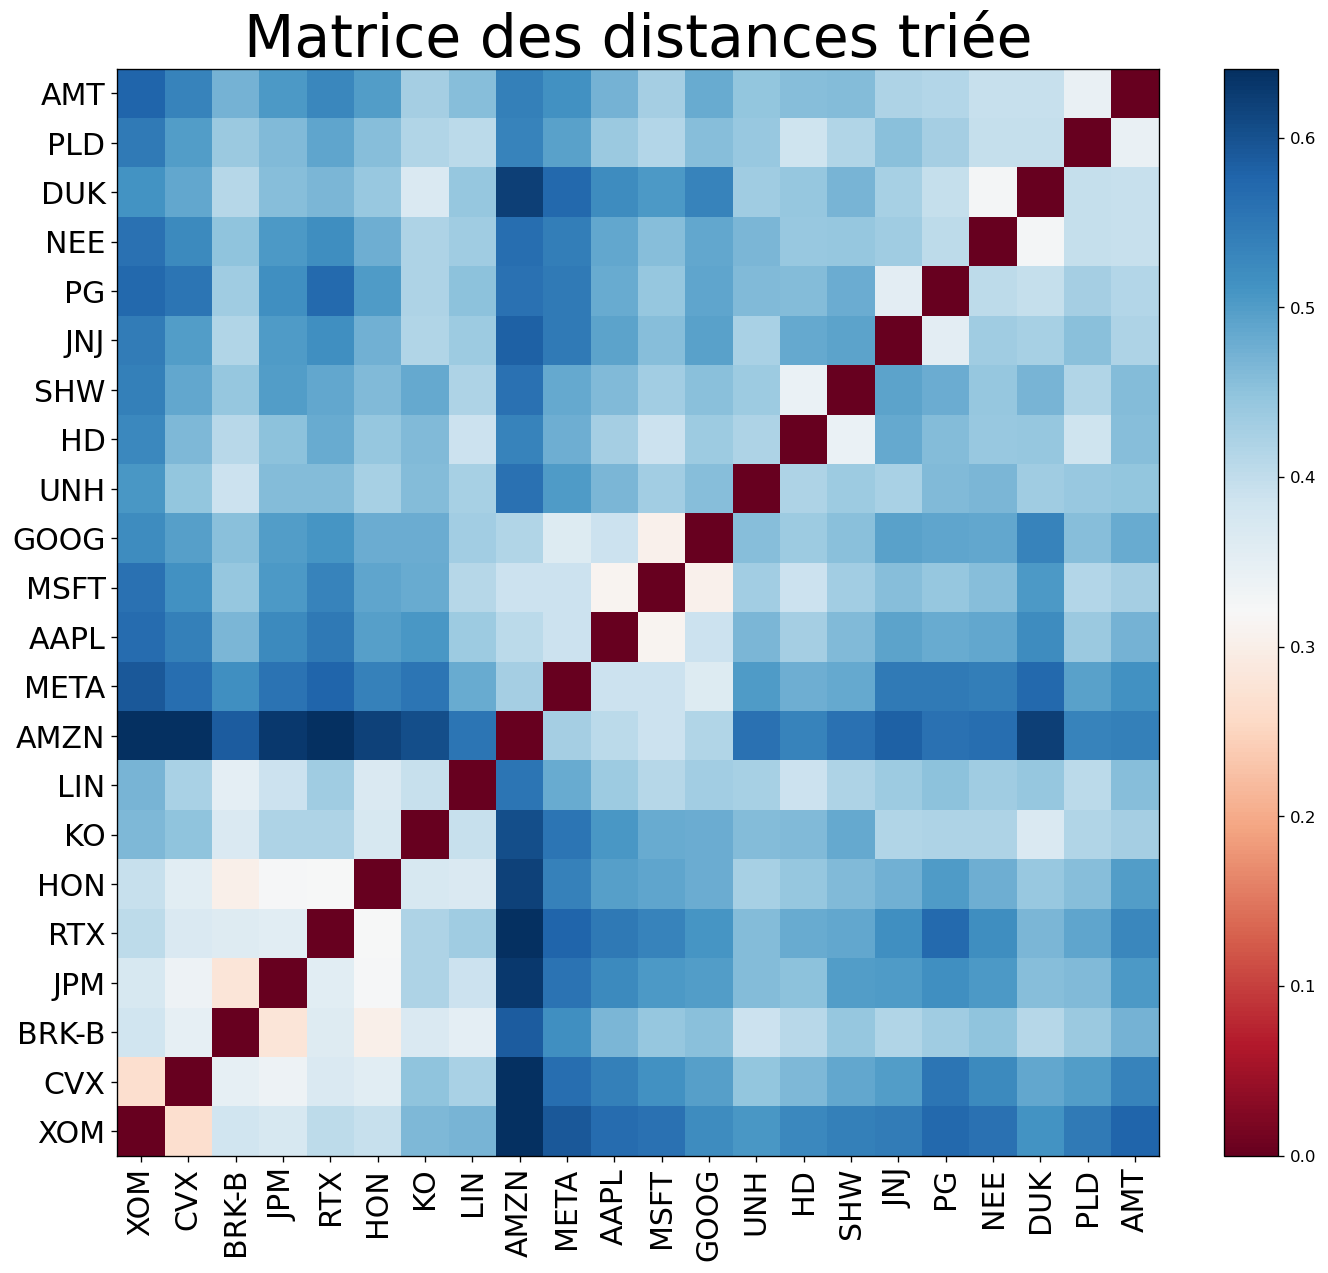

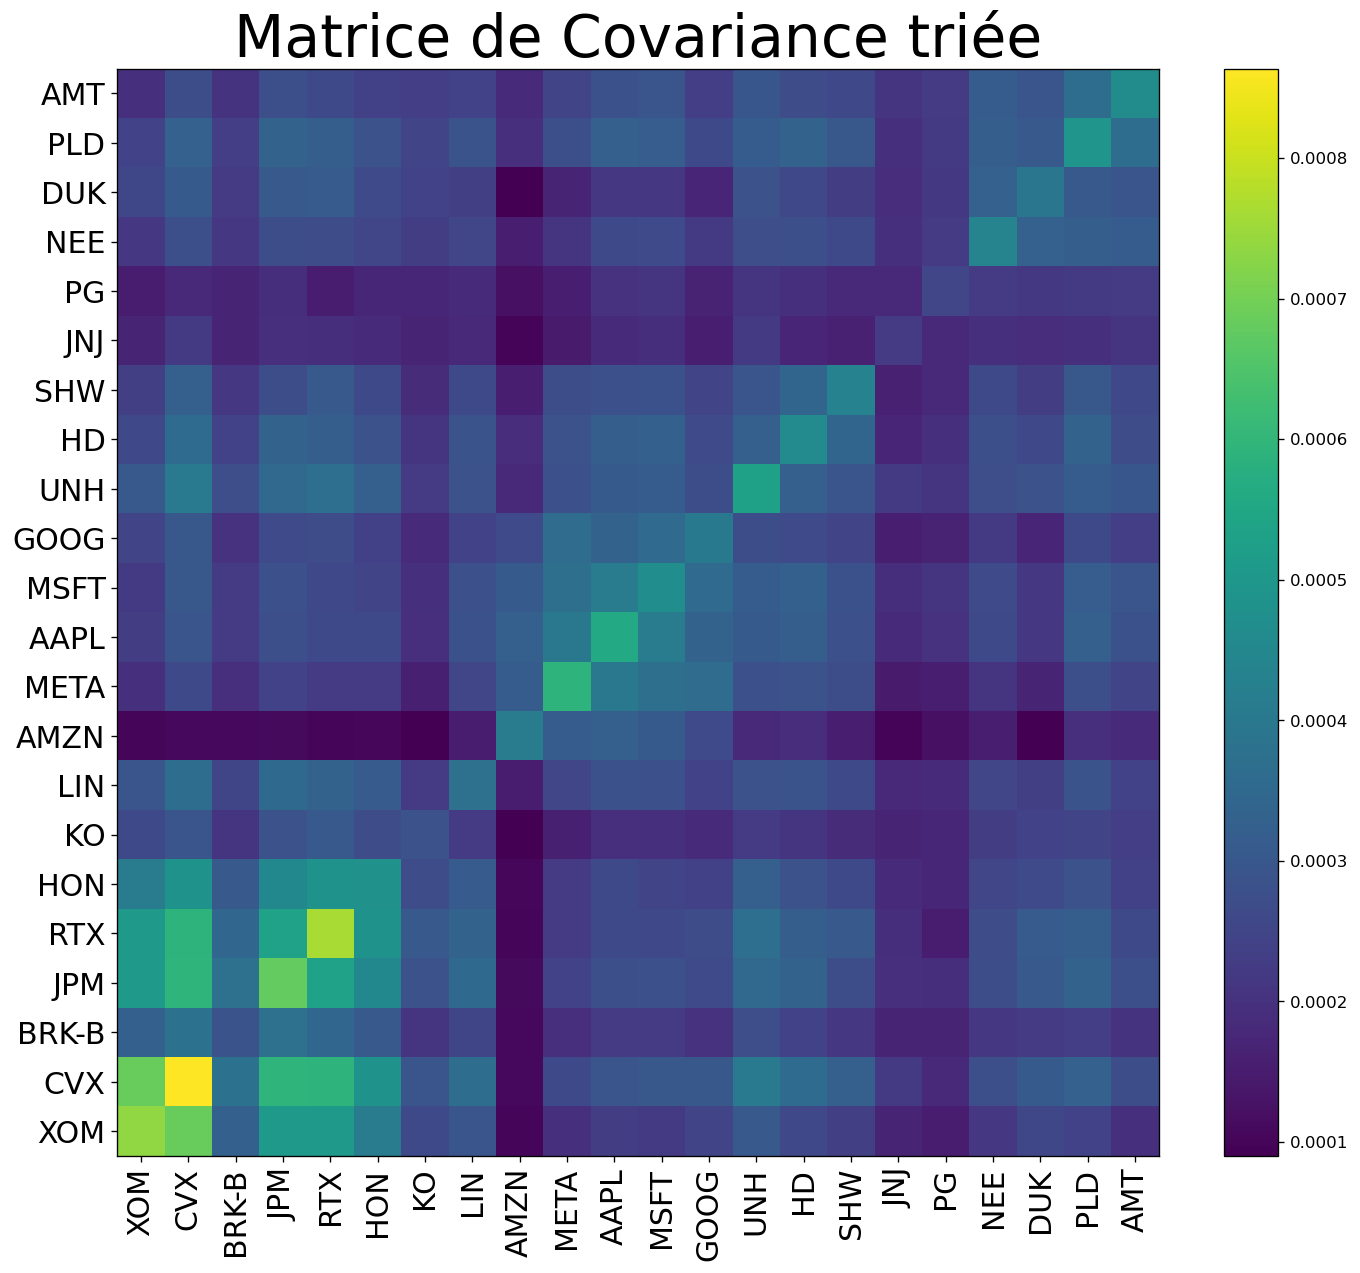

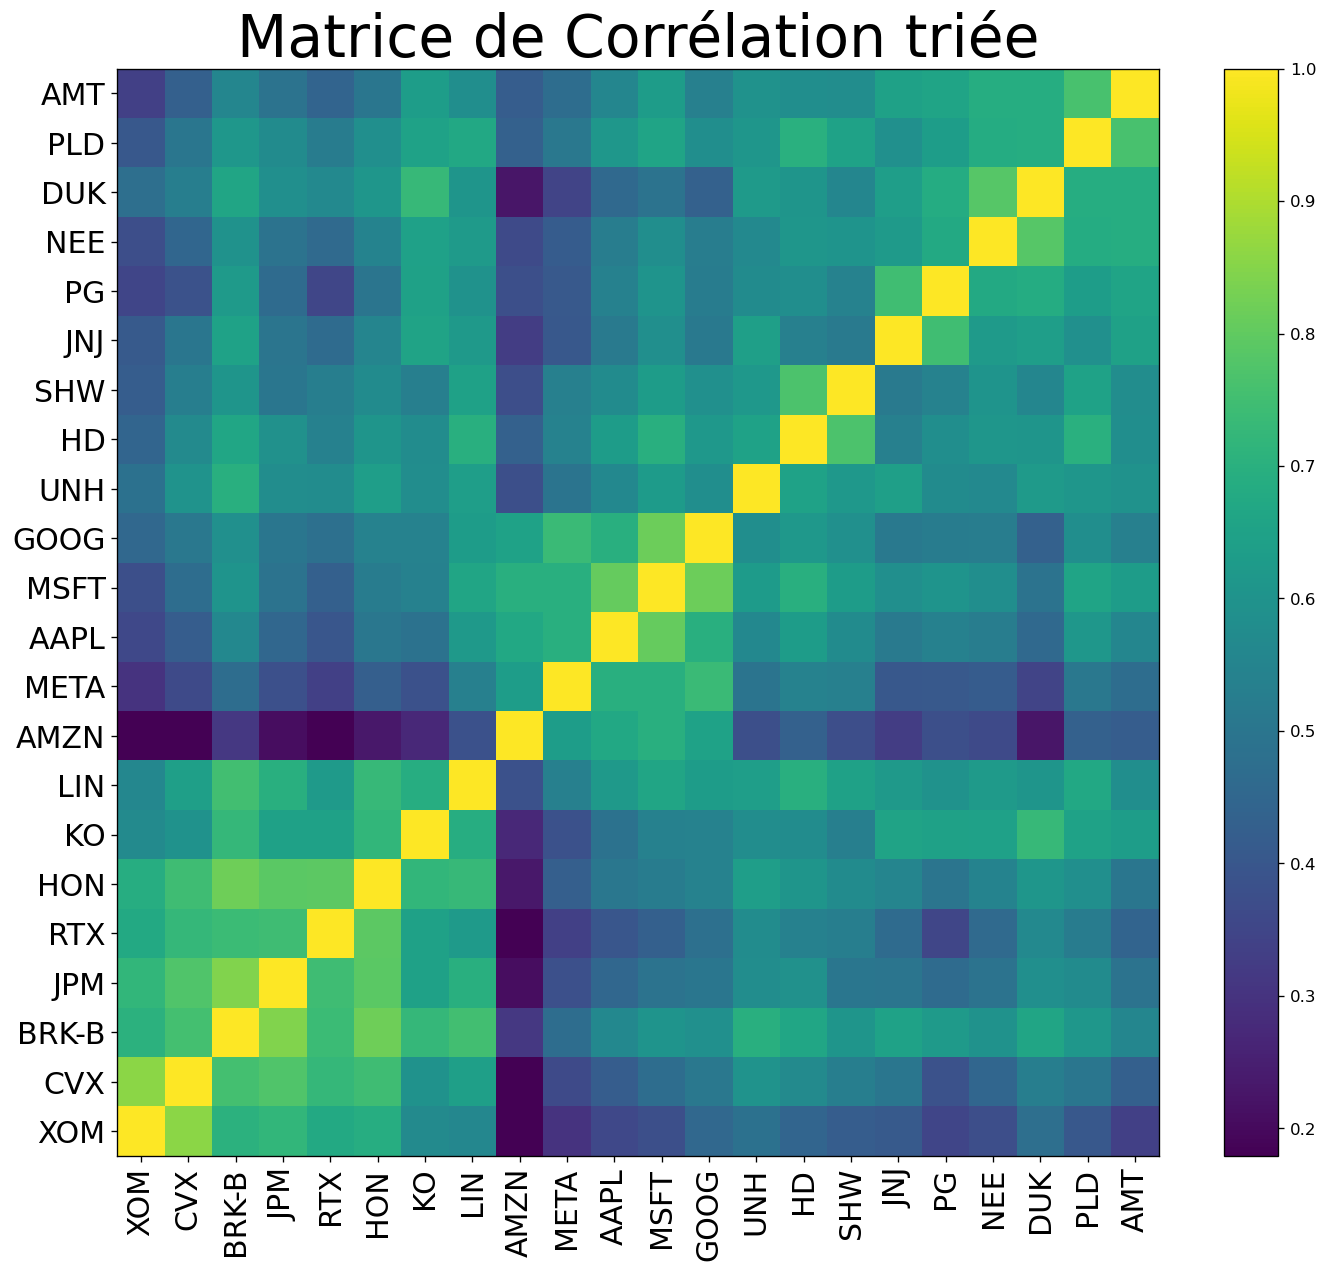

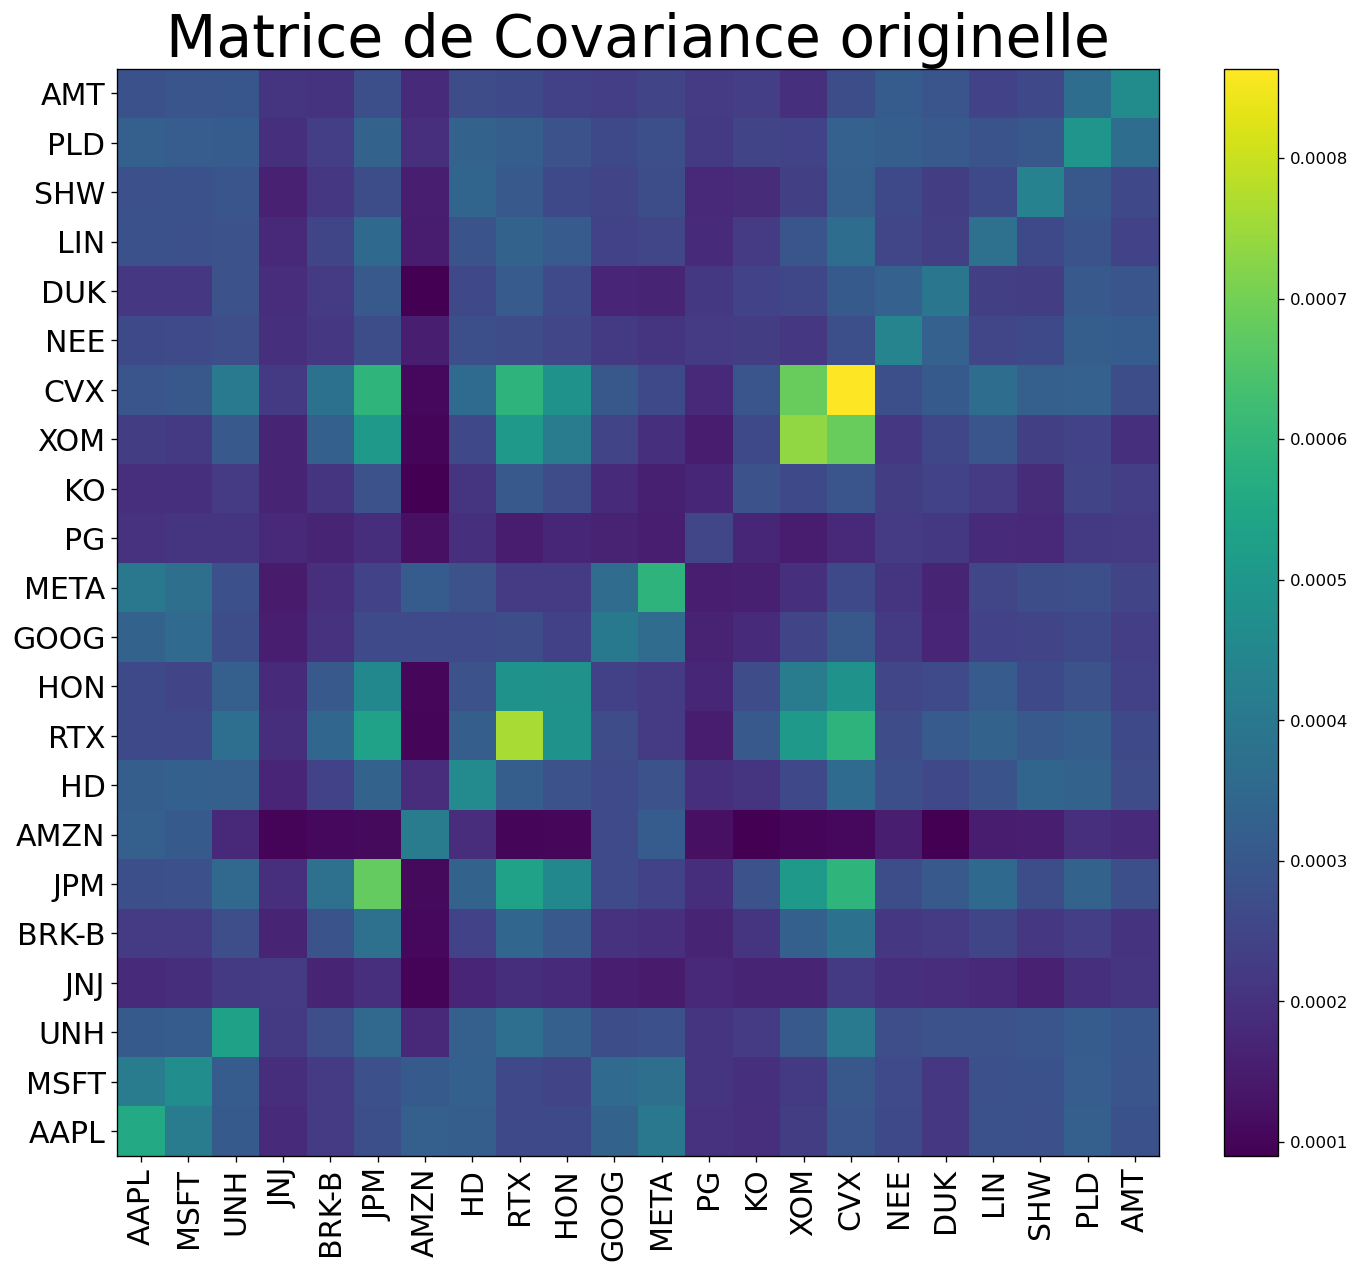

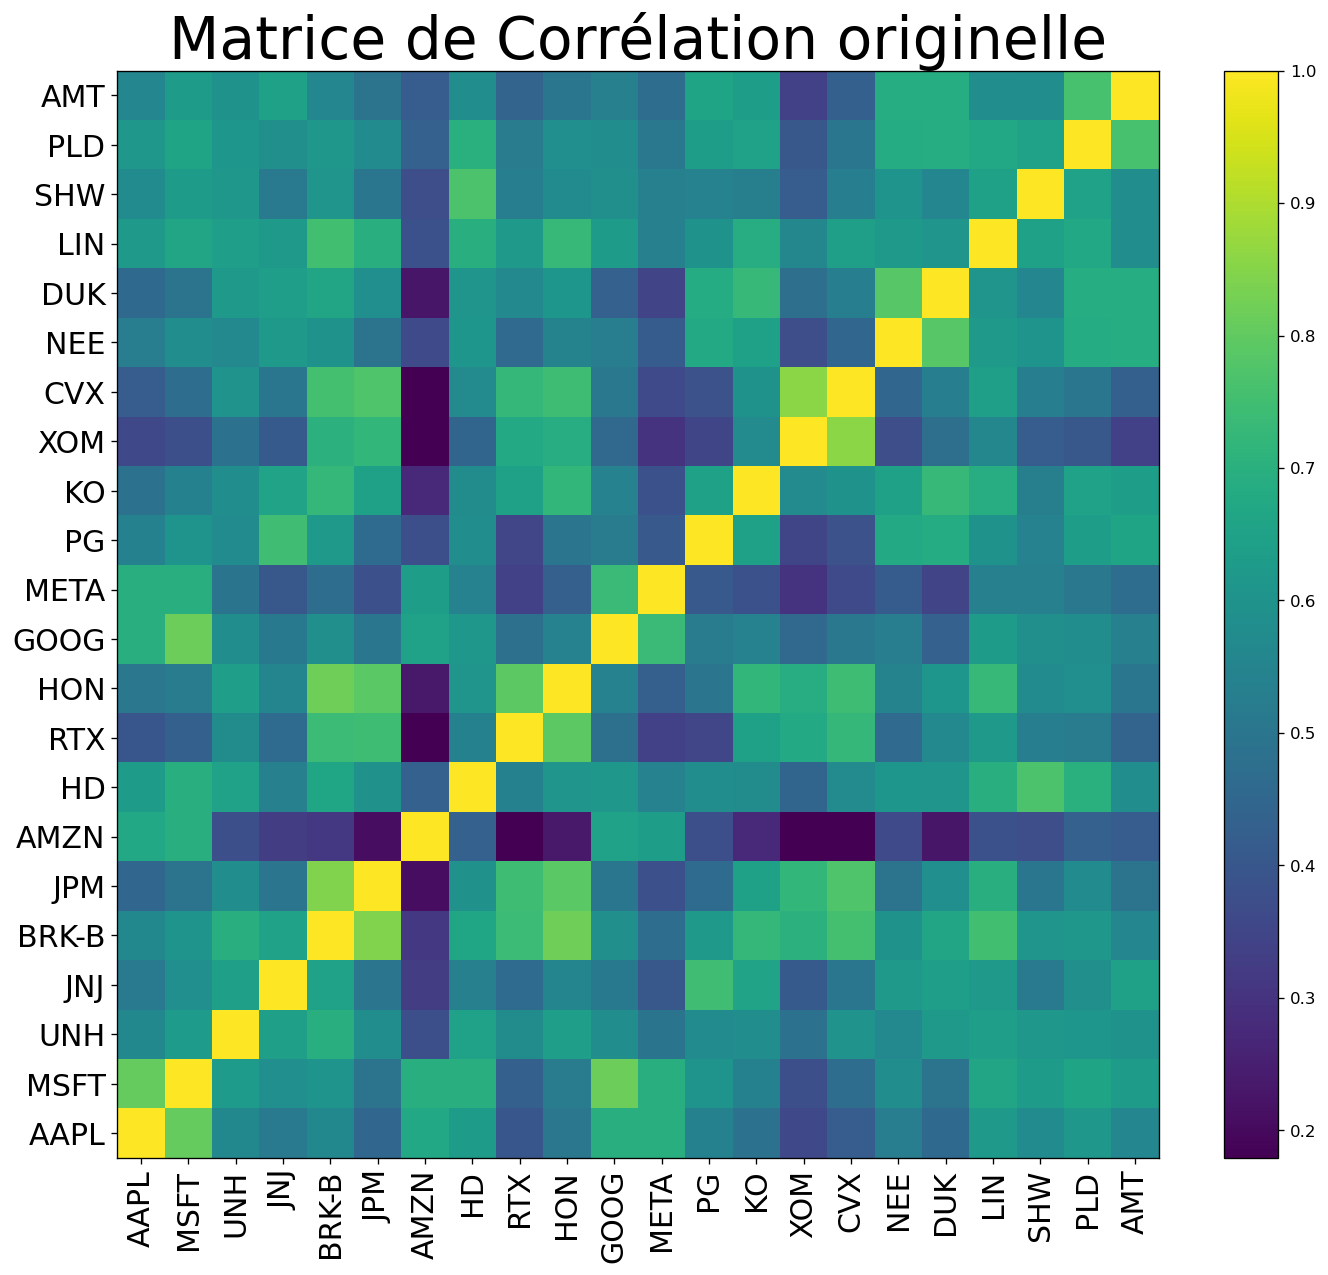

In [8]:
actif_names = returns.columns

# Créer une liste triée des noms d'actifs en fonction de l'ordre res_order
ordered_actif_names = [actif_names[i] for i in res_order]

# Matrice de distance triée
plt.figure(figsize=(14, 12), dpi=120)
plt.pcolormesh(ordered_dist_mat, cmap='RdBu')
plt.colorbar()
plt.title('Matrice des distances triée', fontsize=35)
plt.xticks(np.arange(len(ordered_actif_names)) + 0.5, ordered_actif_names, rotation='vertical', fontsize=18)
plt.yticks(np.arange(len(ordered_actif_names)) + 0.5, ordered_actif_names, fontsize=18)
plt.savefig("/Users/iliasrazig/Documents/mbf3/Mémoire/Matrices de corrélation/Matrice_distance_triee.png")
plt.show()

# Matrice de covariance triée
plt.figure(figsize=(14, 12), dpi=120)
plt.pcolormesh(mat_cov_triee)
plt.colorbar()
plt.title('Matrice de Covariance triée', fontsize=35)
plt.xticks(np.arange(len(ordered_actif_names)) + 0.5, ordered_actif_names, rotation='vertical', fontsize=18)
plt.yticks(np.arange(len(ordered_actif_names)) + 0.5, ordered_actif_names, fontsize=18)
plt.savefig("/Users/iliasrazig/Documents/mbf3/Mémoire/Matrices de corrélation/Matrice_covariance_triee.png")
plt.show()

# Matrice de corrélation triée
plt.figure(figsize=(14, 12), dpi=120)
plt.pcolormesh(mat_corr_triee)
plt.colorbar()
plt.title('Matrice de Corrélation triée', fontsize=35)
plt.xticks(np.arange(len(ordered_actif_names)) + 0.5, ordered_actif_names, rotation='vertical', fontsize=18)
plt.yticks(np.arange(len(ordered_actif_names)) + 0.5, ordered_actif_names, fontsize=18)
plt.savefig("/Users/iliasrazig/Documents/mbf3/Mémoire/Matrices de corrélation/Matrice_correlation_triee.png")
plt.show()


# Matrice de covariance initiale
plt.figure(figsize=(14, 12), dpi=120)
plt.pcolormesh(cov)
plt.colorbar()
plt.title('Matrice de Covariance originelle', fontsize=35)
plt.xticks(np.arange(len(actif_names)) + 0.5, actif_names, rotation='vertical', fontsize=18)
plt.yticks(np.arange(len(actif_names)) + 0.5, actif_names, fontsize=18)
plt.savefig("/Users/iliasrazig/Documents/mbf3/Mémoire/Matrices de corrélation/Matrice_covariance_originelle.png")
plt.show()


# Matrice de correlation initiale
plt.figure(figsize=(14, 12), dpi=120)
plt.pcolormesh(corr)
plt.colorbar()
plt.title('Matrice de Corrélation originelle', fontsize=35)
plt.xticks(np.arange(len(actif_names)) + 0.5, actif_names, rotation='vertical', fontsize=18)
plt.yticks(np.arange(len(actif_names)) + 0.5, actif_names, fontsize=18)
plt.savefig("/Users/iliasrazig/Documents/mbf3/Mémoire/Matrices de corrélation/Matrice_correlation_originelle.png")
plt.show()

In [12]:
def compute_HRP_weights(covariances, res_order):
    weights = pd.Series(1, index=res_order)
    clustered_lists = [res_order] 
    while len(clustered_lists) > 0:

            clustered_lists = [cluster[start:end] for cluster in clustered_lists
                                for start, end in ((0, len(cluster) // 2),
                                                   (len(cluster) // 2, len(cluster)))
                                if len(cluster) > 1]
            
            for subcluster in range(0, len(clustered_lists), 2):
                    left_cluster = clustered_lists[subcluster] # divide into groups every two lists; take the left cluster (list)
                    right_cluster = clustered_lists[subcluster + 1] # take the right cluster (list)

                    left_subcovar = covariances.iloc[left_cluster, left_cluster] # the covariance matrix of the indexes in left clusters
                    inv_diag = 1 / np.diag(left_subcovar.values)
                    parity_w = inv_diag * (1 / np.sum(inv_diag))
                    left_cluster_var = np.dot(parity_w, np.dot(left_subcovar, parity_w))

                    right_subcovar = covariances.iloc[right_cluster, right_cluster] # the covariance matrix of the indexes in right clusters
                    inv_diag = 1 / np.diag(right_subcovar.values)
                    parity_w = inv_diag * (1 / np.sum(inv_diag))
                    right_cluster_var = np.dot(parity_w, np.dot(right_subcovar, parity_w))

                    alloc_factor = 1 - left_cluster_var / (left_cluster_var + right_cluster_var)

                    weights[left_cluster] *= alloc_factor
                    weights[right_cluster] *= 1 - alloc_factor
    noms = actif_names[res_order].to_list()
    weights = pd.Series.to_frame(weights, name = 'Allocation')
    weights['action'] = noms
    weights = weights.set_index('action')
    return weights               
poids_HRP = compute_HRP_weights(cov, res_order)

In [19]:
poids_HRP.to_csv("Portefeuille HRP")
poids_HRP

,Allocation
action,
XOM,0.032261
CVX,0.027463
BRK-B,0.076740
JPM,0.018753
RTX,0.016668
HON,0.062018
KO,0.061852
LIN,0.047100
AMZN,0.068888


In [15]:
stockData = pd.read_csv("/Users/iliasrazig/Documents/mbf3/Mémoire/sp500.csv", header=[0], index_col=[0], parse_dates= True)
topsectosp500 = pd.read_excel("/Users/iliasrazig/Documents/mbf3/Mémoire/stocks_list.xlsx")
stocks = topsectosp500['Ticker Yahoo'].values.tolist()
stockData = stockData[stocks]
stockData = stockData.dropna()
stockData = stockData.loc[stockData.index > '2021-12-31']

def daily_returns (df, allocation):

#Si des poids son définis 
    try :
        weights = allocation['allocation'].tolist()
        # on multiplie les prix par les poids pour avoir une valeur unvestie par action
        df_portfolio_prices_weighted = df*weights
        # Forward filling et before filling appliqués pour gérer les trous 
        df_portfolio_prices_weighted = df_portfolio_prices_weighted.fillna(method="ffill")
        df_portfolio_prices_weighted = df_portfolio_prices_weighted.fillna(method="bfill")
        # On somme le montant engagé dans chaque action pour avoir la valeur liquidative du portefeuille
        df_portfolio_daily_value = df_portfolio_prices_weighted.sum(axis=1)
        # retours entre 2 jours 
        df_portfolio_daily_returns= (df_portfolio_daily_value/df_portfolio_daily_value.shift(1) -1)*100
    except :
        # dans le cas d'un benchmark on utilise uniquement les prix entre 2 jours
        df = df.fillna(method="ffill")
        df = df.fillna(method="bfill")
        df_portfolio_daily_value = df.sum(axis=1)
        df_portfolio_daily_returns= (df_portfolio_daily_value/df_portfolio_daily_value.shift(1) -1)*100
    return df_portfolio_daily_returns




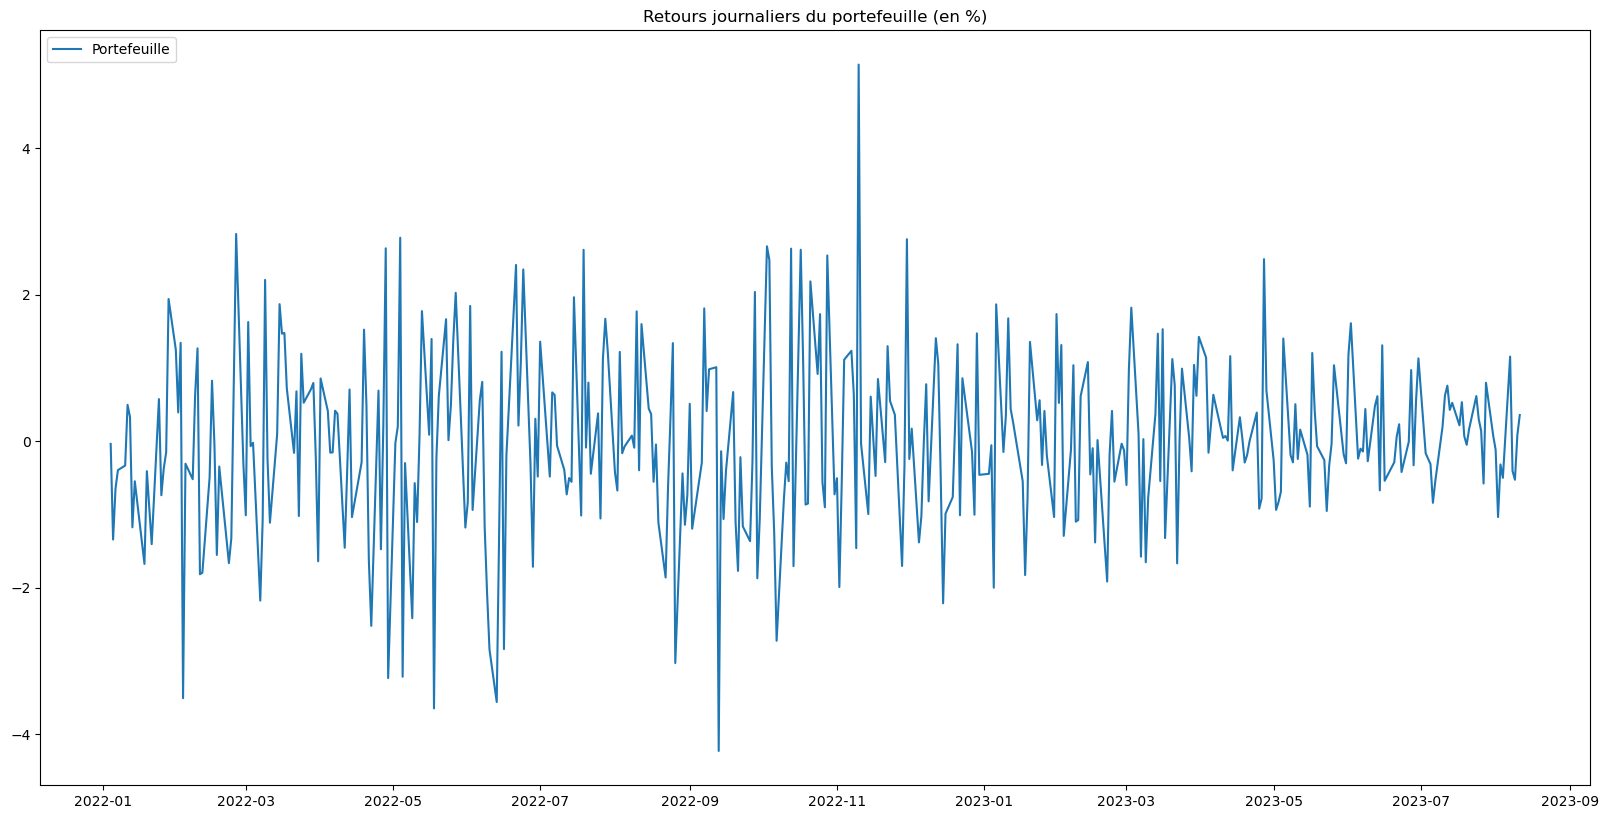

In [21]:
df_portfolio_daily_returns = daily_returns (df = stockData, allocation = poids_HRP)


df_portfolio_daily_returns.to_csv("Retours journaliers du portefeuille optimisé HRP mémoire Ilias.csv")

plt.figure(figsize=(20,10), dpi=100)

# Création du graphique de comparaison des rendements journaliers
plt.plot(df_portfolio_daily_returns, label= "Portefeuille")
plt.legend(loc="upper left")
plt.title("Retours journaliers du portefeuille (en %)")
plt.show()

Date
2022-01-03          NaN
2022-01-04    99.962004
2022-01-05    98.619693
2022-01-06    97.979737
2022-01-07    97.591306
                ...    
2023-08-07    95.339449
2023-08-08    94.951155
2023-08-09    94.450595
2023-08-10    94.528677
2023-08-11    94.865268
Length: 404, dtype: float64


Text(0.5, 1.0, 'Valorisation du portefeuille')

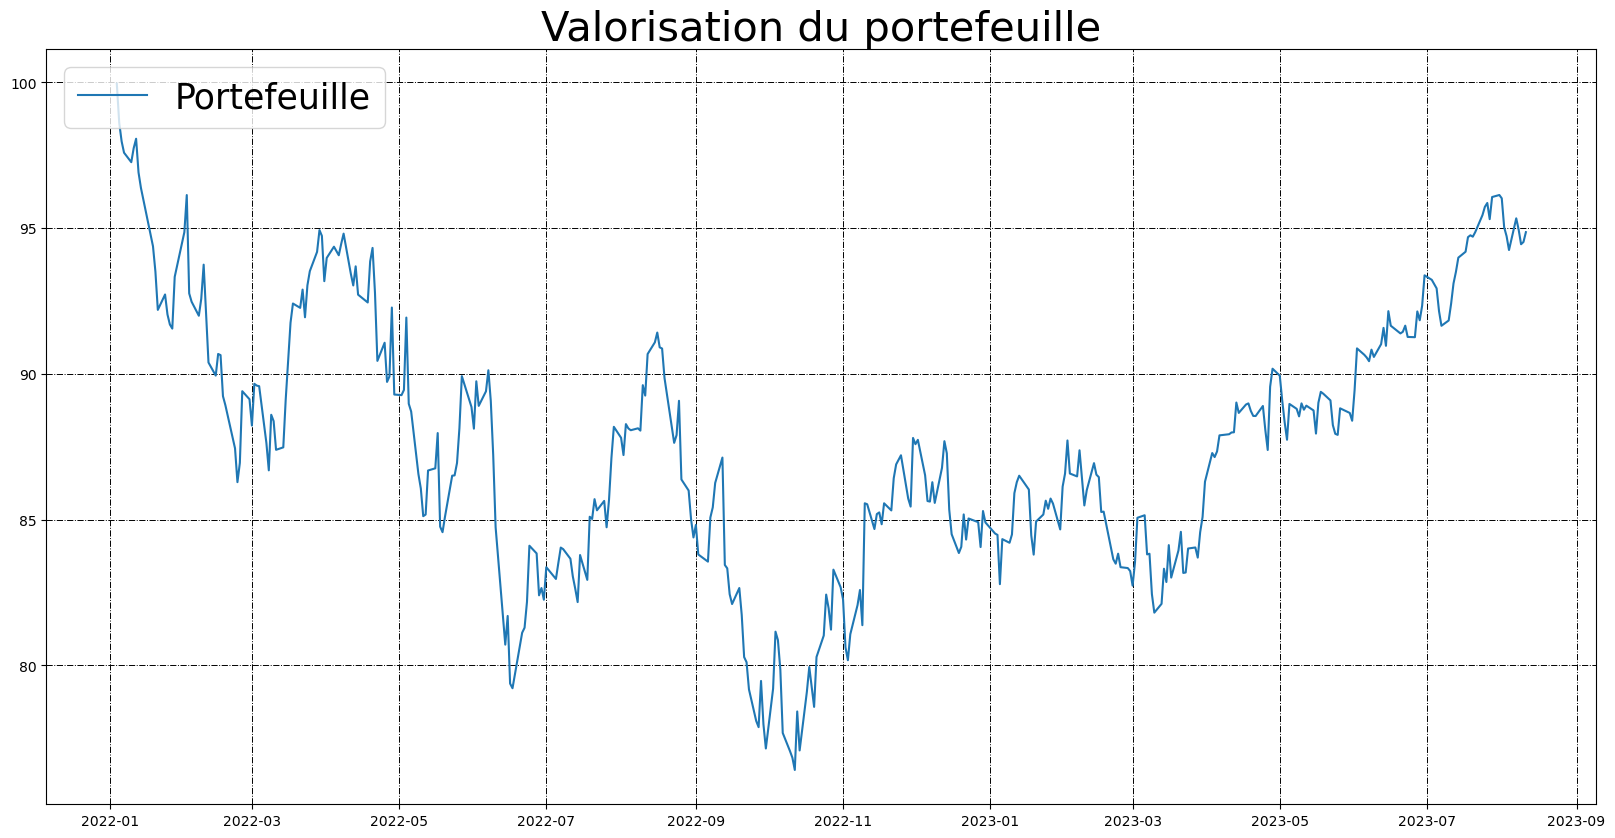

In [17]:
# comparaison de la performance de la stratégie contre l'indice de référence (S&P 500)
start_value = 100

# Calcul de la somme cumulée des retours journaliers
cumulative_returns=((df_portfolio_daily_returns/100)+1).cumprod()*start_value

# Ajout de la valeur cumulée au dataframe
df_portfolio_total_value = cumulative_returns
print(df_portfolio_total_value)
                
# Graphique 
plt.figure(figsize=(20,10), dpi=100)
plt.grid(color='black', linestyle='-.', linewidth=0.7) 
plt.plot(df_portfolio_total_value, label= "Portefeuille")
plt.legend(loc = "upper left", fontsize=25)
plt.title("Valorisation du portefeuille", fontsize=30)

In [20]:
cumulative_returns.to_csv("Valorisation du portefeuille optimisé HRP mémoire Ilias.csv")